https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load user data frame
users=pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
#load user engagement data frame
user_engagement=pd.read_csv('takehome_user_engagement.csv',encoding = "ISO-8859-1")
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
#checking to see if the visited column has any entry other than the integer 1
user_engagement.visited.value_counts()
#the visited column is of no use

1    207917
Name: visited, dtype: int64

In [5]:
#change time_stamp to type datetime
user_engagement['time_stamp']=pd.to_datetime(user_engagement['time_stamp'])

In [6]:
user_engagement.info()
#wee see that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [7]:
users.info()
#we see that there are a few null inputs. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [8]:
#we now work on adding to the users table a column that indicates whether the user is an adopted user

In [9]:

user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
#find which users were adopted

#initialize an emtpy list.
adopted=[]

#loop over each user
for u in users.object_id:
    
    keep=user_engagement[user_engagement['user_id']==u]
    keep=keep.set_index('time_stamp')
    keep=keep.sort_index()
    #do a 7 day rolling count of a user engagement.
    keep=keep.rolling(window='7d').visited.sum().max()
    if keep>=3:
        adopted.append(1)
    else:
        adopted.append(0)
 

In [11]:
users['adopted']=adopted

In [12]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000,12000.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145,0.133500
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968,0.340128
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000,0.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000,0.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000,0.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000,0.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,1.000000


In [13]:
#we see that 13.35 percent of users are adopted users.

In [14]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [15]:
users['creation_time']=pd.to_datetime(users['creation_time'])
users['last_session_creation_time']=users.last_session_creation_time.fillna(0)
users['last_session_creation_time']=pd.to_datetime(users['last_session_creation_time'],unit='s')

#we argue that creation time might not be valuable (this is subject to study)
#we however are more interested in the duration the user has been active.
#i.e. last date active-first day active. This helps. 
#We see that last_session_creation_time has many nulls. This null may be due to 
#the user creating an account but never starting a session (so never active).
#cosequently for those, we simply give them a 0 (time-unit) for activity duration.
#We will assume that this is the meaning of null values for last_session_created.
def get_user_activity_duration(x):
    zeroData=pd.to_datetime(0,unit='s')
    if x.last_session_creation_time==zeroData:
        return pd.Timedelta(0).days
    else:
        return pd.Timedelta(x.last_session_creation_time-x.creation_time).days/7




col=users.apply(lambda x: get_user_activity_duration(x),axis=1)
users['activity_duration_weeks']=col
users=users.drop('creation_time',axis=1)
users=users.drop('last_session_creation_time',axis=1)

In [16]:
users.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,activity_duration_weeks
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0,0.000000
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,1,19.428571
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0,0.000000
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,0,0.142857
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,0,0.714286


In [17]:
#we note that also invited_by_user_id has a lot of null values.
#we assume null values mean they were not invited by anyone.
#since there are many unique inviters in this list, rather than
#assuming each user is a catergorical entity, we transform this feature
#to a boolean: where True indicates have inviter, and false indicates they do not.

users['invited_by_user_id']=pd.isna(users['invited_by_user_id']).astype('int')


In [18]:
users.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,activity_duration_weeks
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,0,0,0.000000
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,0,1,19.428571
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,0,0,0.000000
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,0,0,0.142857
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,0,0,0.714286


Text(0.5,0,'Source')

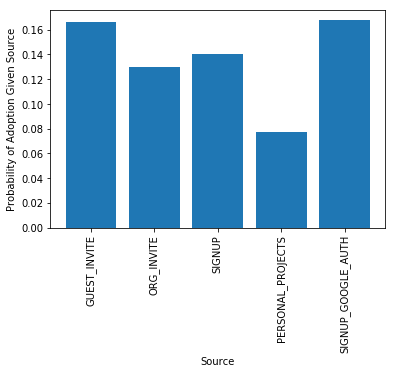

In [19]:
#we are left with 2 categorical variables. creation source and ord_id.
#despite org_id being integer encoded, training a model over this feature
#and obtaining feature importance parameters may be misleading.
#we look first at creation source to see if different creation sources have
#different probability of adoption.

meanOverSouce=[]
for source in users.creation_source.unique():
    meanOverSouce.append(users[users['creation_source']==source].adopted.mean())

plt.bar(users.creation_source.unique(),meanOverSouce)
plt.xticks(rotation=90)
plt.ylabel('Probability of Adoption Given Source')
plt.xlabel('Source')

#looks like there is a considerable difference. We could ofcourse do a proportions test
#to test if our statement is statistically correct.but for simplicity we skip that at the moment.

Text(0.5,0,'Organization')

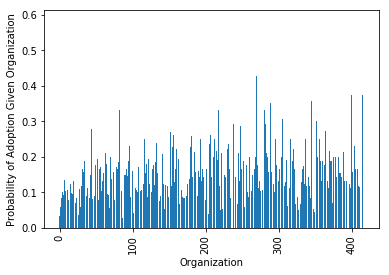

In [20]:
meanOverOrg=[]
for Org in users.org_id.unique():
    meanOverOrg.append(users[users['org_id']==Org].adopted.mean())

plt.bar(users.org_id.unique(),meanOverOrg)
plt.xticks(rotation=90)
plt.ylabel('Probability of Adoption Given Organization')
plt.xlabel('Organization')

#this one is a bit harder to look into. 


Text(0.5,0,'Organization Size')

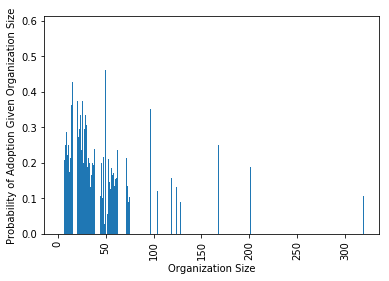

In [21]:
#we check if the higher value are happening to org_ids that have small sample sizes:

plt.bar([users.org_id.value_counts()[i] for i in range(len(users.org_id.unique()))],meanOverOrg)
plt.xticks(rotation=90)
plt.ylabel('Probability of Adoption Given Organization Size')
plt.xlabel('Organization Size')
#it does look like we are getting higher values from companies with smaller sizes. 
#This would be due to the higher variance of means from smaller sample sizes.
#org_id might thus not providing much.
#we could do a more indepth statistical approach here (for each org_id test the hypothesis that the
#population has a proportion of successes that is different that the rest)
#We decide to drop org_id

In [22]:
#we also argue that email and name are of no value.

#split features and labels:
X=users.drop(['object_id','name','email','adopted','org_id'],axis=1)
Y=users['adopted']
X.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,activity_duration_weeks
0,GUEST_INVITE,1,0,0,0.000000
1,ORG_INVITE,0,0,0,19.428571
2,ORG_INVITE,0,0,0,0.000000
3,GUEST_INVITE,0,0,0,0.142857
4,GUEST_INVITE,0,0,0,0.714286


In [23]:
#we one-hot-encode the creation_source column
X = pd.concat([X,pd.get_dummies(X['creation_source'], prefix='source')],axis=1).drop(['creation_source'],axis=1)

In [24]:
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,activity_duration_weeks,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH
0,1,0,0,0.000000,1,0,0,0,0
1,0,0,0,19.428571,0,1,0,0,0
2,0,0,0,0.000000,0,1,0,0,0
3,0,0,0,0.142857,1,0,0,0,0
4,0,0,0,0.714286,1,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [26]:
model=RandomForestClassifier(n_estimators=500)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
from sklearn.metrics import confusion_matrix,f1_score


print('Accuracy Score for Testing Data of:')
print(model.score(X_test,y_test))
print('')
print('Confusion matrix for testing data:')
print(confusion_matrix(y_test,model.predict(X_test)))
print('')
print('f1score for testing data')
print(f1_score(y_test,model.predict(X_test)))



Accuracy Score for Testing Data of:
0.9677777777777777

Confusion matrix for testing data:
[[3052   58]
 [  58  432]]

f1score for testing data
0.8816326530612245


In [28]:
print('Accuracy Score for Training Data of:')
print(model.score(X_train,y_train))
print('')
print('Confusion matrix for training data:')
print(confusion_matrix(y_train,model.predict(X_train)))
print('')
print('f1score for training data')
print(f1_score(y_train,model.predict(X_train)))

Accuracy Score for Training Data of:
0.9871428571428571

Confusion matrix for training data:
[[7245   43]
 [  65 1047]]

f1score for training data
0.9509536784741144


We thus have a model that does well on the training data and generalizes well on unseen data.
The model is thus obtianing valuable information from the features.
We look at this more closely by seeing which features are providing the most
gain for the decision trees. This can be obtained using the method: feature_importances_

In [29]:
FI=pd.DataFrame()
FI['FeatureName']=X.columns
FI['importance']=model.feature_importances_
FI=FI.sort_values('importance',ascending=False)
FI


,FeatureName,importance
3,activity_duration_weeks,0.981929
0,opted_in_to_mailing_list,0.004665
1,enabled_for_marketing_drip,0.003840
6,source_PERSONAL_PROJECTS,0.002987
4,source_GUEST_INVITE,0.001523
8,source_SIGNUP_GOOGLE_AUTH,0.001394
5,source_ORG_INVITE,0.001255
2,invited_by_user_id,0.001205
7,source_SIGNUP,0.001202


## We see that activity duration in weeks, is the most influential feature. This could help relax inc in finding ways to convince users who have signed up to at least start a session at some point. Seems like the longer they stay, the more they are probable to be adopted.

In [31]:
#We test to see how well we can train a model without activity_duration_weeks

In [32]:
X=X.drop('activity_duration_weeks',axis=1)
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH
0,1,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
model=RandomForestClassifier(n_estimators=500)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
print('Accuracy Score for Testing Data of:')
print(model.score(X_test,y_test))
print('')
print('Confusion matrix for testing data:')
print(confusion_matrix(y_test,model.predict(X_test)))
print('')
print('f1score for testing data')
print(f1_score(y_test,model.predict(X_test)))

Accuracy Score for Testing Data of:
0.8669444444444444

Confusion matrix for testing data:
[[3121    0]
 [ 479    0]]

f1score for testing data
0.0


/home/harajlim/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
print('Accuracy Score for Training Data of:')
print(model.score(X_train,y_train))
print('')
print('Confusion matrix for training data:')
print(confusion_matrix(y_train,model.predict(X_train)))
print('')
print('f1score for training data')
print(f1_score(y_train,model.predict(X_train)))

Accuracy Score for Training Data of:
0.8663095238095239

Confusion matrix for training data:
[[7277    0]
 [1123    0]]

f1score for training data
0.0


/home/harajlim/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
#as can be seen, the model does not tell much.

# With that, the most valuable feature ends up being activity_duration_weeks. We note that this feature is zero if the user never started up a session after signing in. This indicates that if relax inc encourages users to start a session after signinig up, the user is likely to be adopted.